In [1]:
import numpy as np

# Load training data
Xtrain = np.loadtxt('Xtrain.csv')

# Load training labels
Ytrain = np.loadtxt('Ytrain.csv')

# Load test data
Xtest = np.loadtxt('Xtest.csv')

## Question No. 2: Nearest Neighbour Classifier
*Perform 5-fold stratified cross-validation over the training dataset using a k-nearest neighbour (kNN) classifier.*

### i. K = 5 Nearest Neighbour Classifier

*Define and calculate the accuracy, balanced accuracy, AUC-ROC, AUC-PR, F1 and Matthews Correlation Coefficient for each fold using this classifier? Show code to demonstrate the results. Calculate the average and standard deviation for each metric across all folds and show these in a single table. As the KNN classifier in sklearn does not support decision_function, be sure to understand and use the predict_proba function for AUC-ROC and AUC-PR calculations or plotting.*

In [2]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, \
    precision_recall_curve, auc, f1_score, matthews_corrcoef

# Define the kNN classifier with k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Initialize StratifiedKFold with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Initialize lists to store metrics for each fold
accuracy_list = []
balanced_list = []
roc_auc_list = []
pr_auc_list = []
f1_list = []
mcc_list = []

# Saved for plotting curves later
probability_list = []
Y_test_fold_list = []

# Loop through each fold
for train_index, test_index in skf.split(Xtrain, Ytrain):
    X_train_fold, X_test_fold = Xtrain[train_index], Xtrain[test_index]
    Y_train_fold, Y_test_fold = Ytrain[train_index], Ytrain[test_index]

    # Fit the kNN classifier on the training data
    knn_classifier.fit(X_train_fold, Y_train_fold)

    # Make predictions on the test data
    predictions = knn_classifier.predict(X_test_fold)

    # Probability of positive class
    probabilities = knn_classifier.predict_proba(X_test_fold)[:, 1]
    probability_list.append(probabilities)
    Y_test_fold_list.append(Y_test_fold)

    # Calculate metrics for this fold
    accuracy_list.append(accuracy_score(Y_test_fold, predictions))
    balanced_list.append(balanced_accuracy_score(Y_test_fold, predictions))
    roc_auc_list.append(roc_auc_score(Y_test_fold, probabilities))

    # Compute precision-recall curve and area for this fold
    precision, recall, _ = precision_recall_curve(Y_test_fold, probabilities)
    pr_auc = auc(recall, precision)
    pr_auc_list.append(pr_auc)

    f1_list.append(f1_score(Y_test_fold, predictions))
    mcc_list.append(matthews_corrcoef(Y_test_fold, predictions))

# Display the results in a table
print(f"{'Metric':<20} {'Fold 1':<10} {'Fold 2':<10} {'Fold 3':<10} {'Fold 4':<10} {'Fold 5':<10}")
print("-" * 71)
print(f"{'Accuracy':<20} {accuracy_list[0]:<10.4f} {accuracy_list[1]:<10.4f} \
{accuracy_list[2]:<10.4f} {accuracy_list[3]:<10.4f} {accuracy_list[4]:<10.4f}")
print(f"{'Balanced Accuracy':<20} {balanced_list[0]:<10.4f} {balanced_list[1]:<10.4f} \
{balanced_list[2]:<10.4f} {balanced_list[3]:<10.4f} {balanced_list[4]:<10.4f}")
print(f"{'AUC-ROC':<20} {roc_auc_list[0]:<10.4f} {roc_auc_list[1]:<10.4f} \
{roc_auc_list[2]:<10.4f} {roc_auc_list[3]:<10.4f} {roc_auc_list[4]:<10.4f}")
print(f"{'AUC-PR':<20} {pr_auc_list[0]:<10.4f} {pr_auc_list[1]:<10.4f} \
{pr_auc_list[2]:<10.4f} {pr_auc_list[3]:<10.4f} {pr_auc_list[4]:<10.4f}")
print(f"{'F1 Score':<20} {f1_list[0]:<10.4f} {f1_list[1]:<10.4f} \
{f1_list[2]:<10.4f} {f1_list[3]:<10.4f} {f1_list[4]:<10.4f}")
print(f"{'MCC':<20} {mcc_list[0]:<10.4f} {mcc_list[1]:<10.4f} \
{mcc_list[2]:<10.4f} {mcc_list[3]:<10.4f} {mcc_list[4]:<10.4f}")

Metric               Fold 1     Fold 2     Fold 3     Fold 4     Fold 5    
-----------------------------------------------------------------------
Accuracy             0.9167     0.9150     0.8983     0.8967     0.9150    
Balanced Accuracy    0.7252     0.7171     0.6722     0.7212     0.6793    
AUC-ROC              0.8961     0.8539     0.8627     0.8486     0.8548    
AUC-PR               0.6493     0.6004     0.5548     0.5553     0.5832    
F1 Score             0.5455     0.5321     0.4404     0.5000     0.4848    
MCC                  0.5054     0.4920     0.3901     0.4424     0.4629    


In [3]:
# Calculate average and standard deviation for each metric
avg_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)

avg_balanced = np.mean(balanced_list)
std_balanced = np.std(balanced_list)

avg_roc_auc = np.mean(roc_auc_list)
std_roc_auc = np.std(roc_auc_list)

avg_pr_auc = np.mean(pr_auc_list)
std_pr_auc = np.std(pr_auc_list)

avg_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

avg_mcc = np.mean(mcc_list)
std_mcc = np.std(mcc_list)

# Display the results in a table
print(f"{'Metric':<20} {'Average':<10} {'Standard Deviation':<20}")
print("-" * 50)
print(f"{'Accuracy':<20} {avg_accuracy:<10.4f} {std_accuracy:<20.4f}")
print(f"{'Balanced Accuracy':<20} {avg_balanced:<10.4f} {std_balanced:<20.4f}")
print(f"{'AUC-ROC':<20} {avg_roc_auc:<10.4f} {std_roc_auc:<20.4f}")
print(f"{'AUC-PR':<20} {avg_pr_auc:<10.4f} {std_pr_auc:<20.4f}")
print(f"{'F1 Score':<20} {avg_f1:<10.4f} {std_f1:<20.4f}")
print(f"{'MCC':<20} {avg_mcc:<10.4f} {std_mcc:<20.4f}")

Metric               Average    Standard Deviation  
--------------------------------------------------
Accuracy             0.9083     0.0089              
Balanced Accuracy    0.7030     0.0225              
AUC-ROC              0.8632     0.0171              
AUC-PR               0.5886     0.0350              
F1 Score             0.5006     0.0371              
MCC                  0.4585     0.0407              


### ii. ROC and PR Curves for One Fold

*What are your observations about the ROC and PR curves? What  part of the ROC curve is more important for this problem?*

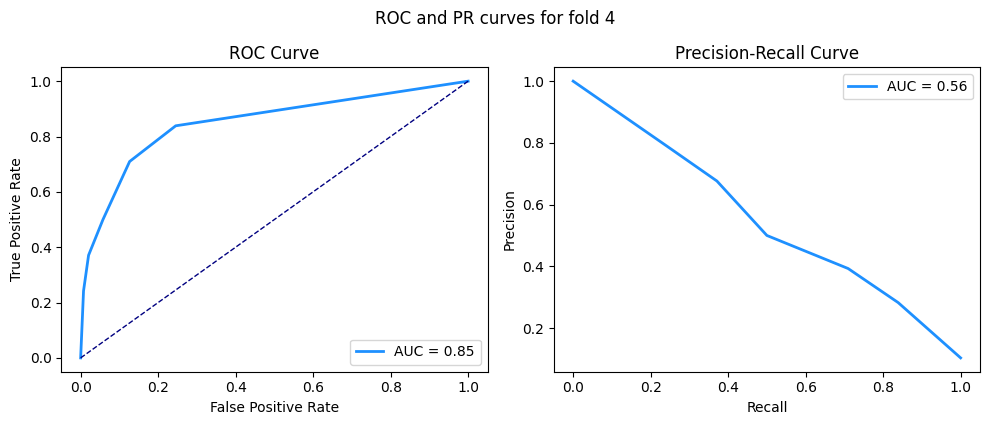

In [4]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import random

# Choose a fold randomly
fold_index = random.randint(0, 4)
probabilities = probability_list[fold_index]
Y_test_fold = Y_test_fold_list[fold_index]

# Compute ROC curve and ROC area for the selected fold
fpr, tpr, _ = roc_curve(Y_test_fold, probabilities)
roc_auc = auc(fpr, tpr)

# Compute precision-recall curve and area for the selected fold
precision, recall, _ = precision_recall_curve(Y_test_fold, probabilities)
pr_auc = auc(recall, precision)

# Plotting
plt.figure(figsize=(10, 4))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='dodgerblue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='dodgerblue', lw=2, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')

plt.tight_layout()
plt.suptitle(f"ROC and PR curves for fold {fold_index+1}", y=1.05)
plt.show()

The ROC curve is above the diagonal line, indicating that the performance of the KNN classifier is superior to that of a random classifier. Additionally, the curve ascends more rapidly in the initial stages, further emphasizing the classifier's effectiveness. The PR curve closely approximates a diagonal line with a slope of -1, suggesting that when one of precision or recall increases, the decrease in the other is symmetrical. This signifies a balanced trade-off between precision and recall for the classifier.

Given an unbalanced test set where negative examples far outnumber positive ones, the crucial part of the ROC curve is near the top-left corner. This region corresponds to pursuing low false positive rates. In imbalanced datasets where the negative class is dominant, minimizing False Positive Rate is crucial to avoid misclassifying the majority of instances that are negative, otherwise it is possible to have a seemingly small FPR but still a large number of negative instances incorrectly classified as positive.

### iii. Explore Pre-processing Techniques

*What is the impact of various forms of pre-processing (e.g., mean-standard deviation or standard scaling or min-max scaling) on the cross-validation performance? Show code to demonstrate the results and write a summary of your findings. Do any pre-processing techniques improve predictive performance or training speed? Why do you think this is the case?*

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, \
    roc_auc_score, precision_recall_curve, auc, f1_score, matthews_corrcoef
import time

# Define the preprocessors
preprocessors = {
    'No Scaling': None,  # Placeholder for no scaling
    'Standard Scaling': StandardScaler(),
    'Min-Max Scaling': MinMaxScaler()
}

# Define the classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Add a new function to calculate PR AUC
def pr_auc_score(y_true, y_pred):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    return auc(recall, precision)

# Define the metrics to evaluate
metrics = {
    'Accuracy': accuracy_score,
    'Balanced Accuracy': balanced_accuracy_score,
    'ROC AUC': roc_auc_score,
    'PR AUC': pr_auc_score,
    'F1 Score': f1_score,
    'MCC': matthews_corrcoef
}

print('='*51)

# Loop through each pre-processing method
for preprocessor_name, preprocessor in preprocessors.items():
    print(f"Results for {preprocessor_name}:\n{'-'*51}")
        
    # Apply preprocessor if not None
    # If no preprocessor, use original data
    if preprocessor:
        Xtrain_scaled = preprocessor.fit_transform(Xtrain)
    else:
        Xtrain_scaled = Xtrain

    # Perform 5-fold stratified cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    metric_values_list = {metric_name: [] for metric_name in metrics}
    total_training_time = 0

    for train_index, test_index in skf.split(Xtrain_scaled, Ytrain):
        X_train_fold, X_test_fold = Xtrain_scaled[train_index], Xtrain_scaled[test_index]
        Y_train_fold, Y_test_fold = Ytrain[train_index], Ytrain[test_index]

        # Fit the classifier on the training data
        start_time = time.time()
        knn_classifier.fit(X_train_fold, Y_train_fold)
        end_time = time.time()
        total_training_time += end_time - start_time

        # Loop through each metric
        for metric_name, metric_func in metrics.items():
            # Make predictions on the test data
            predictions = knn_classifier.predict(X_test_fold)
            probabilities = knn_classifier.predict_proba(X_test_fold)[:, 1]

            # Calculate the metric for this fold
            if metric_name in ['ROC AUC', 'PR AUC']:
                metric_value = metric_func(Y_test_fold, probabilities)
            else:
                metric_value = metric_func(Y_test_fold, predictions)
            metric_values_list[metric_name].append(metric_value)

    # Print the average and standard deviation of the metrics across all folds
    for metric_name, metric_values in metric_values_list.items():
        average_value = np.mean(metric_values)
        std_dev_value = np.std(metric_values)
        print(f"Average {metric_name}: {average_value:.4f} (Std Dev: {std_dev_value:.4f})")
    
    print(f"Average training time: {(total_training_time/5):.4f}")
    print('='*51)

Results for No Scaling:
---------------------------------------------------
Average Accuracy: 0.9120 (Std Dev: 0.0089)
Average Balanced Accuracy: 0.7163 (Std Dev: 0.0292)
Average ROC AUC: 0.8559 (Std Dev: 0.0346)
Average PR AUC: 0.5823 (Std Dev: 0.0626)
Average F1 Score: 0.5243 (Std Dev: 0.0515)
Average MCC: 0.4814 (Std Dev: 0.0545)
Average training time: 0.0069
Results for Standard Scaling:
---------------------------------------------------
Average Accuracy: 0.9083 (Std Dev: 0.0062)
Average Balanced Accuracy: 0.7130 (Std Dev: 0.0348)
Average ROC AUC: 0.8695 (Std Dev: 0.0166)
Average PR AUC: 0.5842 (Std Dev: 0.0392)
Average F1 Score: 0.5104 (Std Dev: 0.0512)
Average MCC: 0.4658 (Std Dev: 0.0482)
Average training time: 0.0052
Results for Min-Max Scaling:
---------------------------------------------------
Average Accuracy: 0.9130 (Std Dev: 0.0078)
Average Balanced Accuracy: 0.7183 (Std Dev: 0.0322)
Average ROC AUC: 0.8601 (Std Dev: 0.0470)
Average PR AUC: 0.5897 (Std Dev: 0.0666)
Avera

The impact of applying a scaler to a KNN classifier on predictive performance is limited. Some factors to consider:

1. **Distance Metric**: KNN relies on distance metrics to determine the neighbors of a data point. Rescaling features doesn't affect the relative distances between points, as it merely stretches or compresses the feature space uniformly.

2. **Feature Distributions**: KNN makes minimal assumptions about the underlying distribution of features. If the original feature distributions are not significantly skewed, normalization might not yield substantial improvements.

3. **Robustness to Outliers**: KNN is generally robust to outliers since it looks at the majority class among its neighbors. Feature scaling might not have a pronounced impact on the algorithm's behavior in the presence of outliers.

In summary, the inherent characteristics of the KNN algorithm, which focuses on local relationships, make it less sensitive to the absolute scale of features. Consequently, the application of scaling may not lead to significant performance improvements.

<br>

Some possible explanations for the consistent training speed across different scaling methods:

1. **Computational Complexity**: The primary computational cost of KNN comes during the prediction phase when distances need to be calculated for each test instance against all training instances. This step is unaffected by feature scaling.

2. **Data Size**: For small datasets, the overhead of scaling might be negligible compared to the overall training time.

Most importantly, the KNN algorithm's nature provides a consistent training speed regardless of feature scaling.